In [1]:
import Motoresdecombustioninterna as th

In [2]:
p2=176.4
p1=14.7

In [3]:
th.TemperaturaING(519)

,Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R),Pr
Temperatura(R),,,,
510.0,6.9530,-236.30,46.0130,1.1375
519.0,6.9539,-173.66,46.1345,1.2095
520.0,6.9540,-166.70,46.1480,1.2175


In [4]:
pr1=1.2095

In [5]:
th.formulasFriccionPresiones()

In [6]:
pr2i=pr1*p2/p1
pr2i

In [7]:
th.PresionRelING(pr2i)

,Temperatura(R),Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R)
Pr,,,,
14.230,1040.000000,7.241000,3507.000000,51.033000
14.514,1045.546875,7.245715,3547.214844,51.071273
15.254,1060.000000,7.258000,3652.000000,51.171000


In [8]:
th.TemperaturaING(2520)

,Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R),Pr
Temperatura(R),,,,
2500.0,8.289,14942.6,57.834,436.1
2520.0,8.298,15108.5,57.901,450.9
2540.0,8.307,15274.5,57.966,466.0


In [9]:
th.formulasFriccionPresiones()

In [10]:
pr5i=450.9*14.7/176.4
pr5i

In [11]:
th.PresionRelING(pr5i)

,Temperatura(R),Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R)
Pr,,,,
36.429,1340.000000,7.514000,5719.700000,52.901000
37.575,1350.909091,7.523818,5801.790909,52.962091
38.530,1360.000000,7.532000,5870.200000,53.013000


In [12]:
wci=3547.214844--173.66
wci

In [13]:
h2r=th.eficienciaCompresor(eficCompresor=0.87,h1=-173.66, h2i=3547.214844)
h2r

In [14]:
th.EntalpiaING(h2r)

,Temperatura(R),Cp(Btu/mol*R),s(Btu/mol*R),Pr
h(Btu/mol),,,,
4089.100000,1120.000000,7.311000,51.572000,18.666000
4103.207637,1121.927273,7.312735,51.584527,18.787129
4235.500000,1140.000000,7.329000,51.702000,19.923000


In [15]:
th.excesoAire()

In [16]:
th.reaccionGeneral(X=8)

La reacción general es
C8H18 + 12.5 O2 --> 8 CO2 + 9.0 H2O
La reacción con aire seco es
C8H18 + 59.6659 AS --> 8 CO2 + 9.0 H2O + 59.6659 AS-12.5 O2


Los moles para la reacción con aire seco

C8H18	1
 O2	-12.5
 CO2	8
 H2O	9.0
Aire	59.6659


In [17]:
#El valor arriba es para el octano teorico, pero se necesita conocer con las temperaturas deseadas
t2r=1121.927186 #°R Viene de la entalpia 2 real
t3=2520  #°R

In [18]:
c8h18=th.moleculaEntalpia("c8h18",537,1)
c8h18

-107462

In [19]:
aireseco1=th.moleculaEntalpia("aire seco",t2r,1)
aireseco1

In [20]:
co2=th.moleculaEntalpia("co2",t3,1)
co2

In [21]:
h2o=th.moleculaEntalpia("h2o",t3,1)
h2o

In [22]:
aireseco2=th.moleculaEntalpia("aire seco",t3,1)
aireseco2

In [23]:
o2=th.moleculaEntalpia("o2",t3,1)
o2

In [24]:
aireseco=aireseco1-aireseco2
aireseco #Entalpia sin mol de aire seco

In [25]:
valsinvar=8*co2+9*h2o-12.5*o2
valsinvar

In [26]:
valsinvar=valsinvar-c8h18
valsinvar

In [27]:
molaireideal=valsinvar/aireseco
molaireideal

In [28]:
pea=th.excesoAire(suministradaReal=183.6492,suministradaTeorica=59.666) #Porcentaje de exceso de aire
pea

Trabajo de turbina de gas

In [29]:
H3=8*co2+9*h2o+183.5*aireseco2-12.5*o2
H3

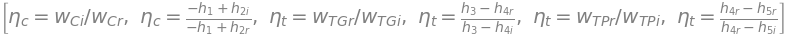

In [30]:
th.formulasFriccion()

In [31]:
wcr=h2r--173.66
wtgr=wcr
wtgr #Tiene unidades de BTU/lb-mol de aire seco


In [32]:
WTGR=wtgr*183.5 # Tiene unidades de BTU/lb-mol de combustible C8H18
WTGR

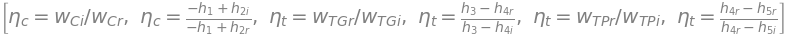

In [33]:
th.formulasFriccion()

In [34]:
H4R=H3-WTGR
H4R

In [35]:
H4I=th.eficienciaTurbinaGas(eficTurbinaGas=0.89,h3=H3,h4r=H4R)
H4I # BTU / lbmol C8H18

In [36]:
wtgi=H3-H4I
wtgi # BTU / lbmol C8H18

In [37]:
fi=lambda T: 8*th.moleculaEntalpia("CO2",T,1)+9*th.moleculaEntalpia("H2O",T,1)+183.5*th.moleculaEntalpia("aire seco",T,1)-12.5*th.moleculaEntalpia("o2",T,1)-H4I
#Para temperatura ideal 4

In [38]:
th.raizFuncion(fi,0.0001,1)

-6.37383200228214e-5
N° de iteraciones: 34


In [39]:
t4i=1967

Presión de salida de turbina generadora de gas

In [40]:
s = lambda T: 8*th.moleculaEntropia("Co2",T,1)+9*th.moleculaEntropia("h2o",T,1)+183.5*th.moleculaEntropia("aire seco",T,1)-12.5*th.moleculaEntropia("o2",T,1)

In [41]:
s3=s(2520)
s3

In [42]:
s4i=s(t4i)
s4i

In [43]:
molProducto=8+9+183.5-12.5
molProducto

In [44]:
p4=th.expansionIsentropica34i(1,s3=s3,s4i=s4i,p3=176.4,molPr=molProducto)
p4 #Presión 4

In [45]:
fa=lambda T: 8*th.moleculaEntalpia("co2",T,1)+9*th.moleculaEntalpia("h2o",T,1)+183.5*th.moleculaEntalpia("aire seco",T,1)-12.5*th.moleculaEntalpia("o2",T,1)-H4R
#Para temperatura real 4

In [46]:
th.raizFuncion(fa,0.0001,1)

-5.89007977396250e-5
N° de iteraciones: 30


In [47]:
t4r=2029 #R

Turbina de potencia

In [48]:
s4r=s(t4r)
s4r #Entropia 4 real

In [49]:
s5i=th.expansionIsentropica45i(1,s4a=s4r,p4=61.33,p5=14.7,molPr=molProducto)
s5i

In [50]:
f5i=lambda T: 8*th.moleculaEntropia("co2",T,1)+9*th.moleculaEntropia("h2o",T,1)+183.5*th.moleculaEntropia("aire seco",T,1)-12.5*th.moleculaEntropia("o2",T,1)-s5i

In [51]:
th.raizFuncion(f5i,0.0001,1)

1.95115335372975e-5
N° de iteraciones: 22


In [52]:
t5i=1430

In [53]:
h=lambda T: 8*th.moleculaEntalpia("co2",T,1)+9*th.moleculaEntalpia("h2o",T,1)+183.5*th.moleculaEntalpia("aire seco",T,1)-12.5*th.moleculaEntalpia("o2",T,1)

In [54]:
h5i=h(t5i)
h5i

In [55]:
wtpi=H4R-h5i
wtpi

In [56]:
wtpr=wtpi*0.89
wtpr #Btu/lbmolC8H18

In [57]:
wtpra=wtpr/183.5
wtpra #Btu/lbmolaireseco
#TRABAJO POR MOL DE AIRE SECO

In [58]:
h5a=th.eficienciaTurbinaPotencia(eficTurbinaPotencia=0.89,h4r=H4R,h5i=h5i)
h5a

In [59]:
ft5a=lambda T: h(T)-h5a

In [60]:
th.raizFuncion(ft5a,0.0001,1)

-2.75688944384456e-5
N° de iteraciones: 29


In [61]:
t5a=1496

Calor agregado en la cámara de combustión para eficiencia termica

El calor agregado es el más bajo en calentamiento

In [62]:
th.compuestosTabla

,Compuesto,Btu/mol,J/mol,Peso de la formula,Estado
Formula,,,,,
Ar,Argón,0,0,39.9480,Gas
C,Carbono (grafito),0,0,12.0112,Sólido
CO,Monóxido de carbono,-47517,-110525,28.0106,Gas
CO2,Bióxido de carbono,-169179,-393510,44.0100,Gas
CH4,Metano,-32162,-74809,16.0430,Gas
C2H6,Etano,-36408,-84685,32.0701,Gas
C3H8,Propano,-44647,-103849,44.0976,Gas
C4H10,n-butano,-63480,-147655,58.1248,Líquido
C7H16,n-heptano,-96471,-224392,100.2064,Líquido


In [63]:
relCA=th.relCombustibleAire(C=1,A=183.5,CM=114.2336,AM=th.aireSecoMol)
relCA

In [64]:
entalpiaCombustion=abs(8*th.moleculaEntalpia("co2",537,1)+9*th.moleculaEntalpia("h2o",537,1)-1*th.moleculaEntalpia("c8h18",537,1))
entalpiaCombustion
#BTU/lbmolaireseco

In [65]:
qagregado=relCA*entalpiaCombustion/114.2336
qagregado #Btu/lb

In [66]:
qaire=qagregado*th.aireSecoMol
qaire #Btu/lbmolaireseco

In [67]:
qent=qaire*molaireideal #BTU/molc8h18
qent

Finalización del programa

In [68]:
eficTerm=wtpr/qent
eficTerm

In [69]:
hp = 1*wtpra*3600/(th.aireSecoMol*2545)
hp

In [70]:
LEC = 2545/(entalpiaCombustion/114.2336*eficTerm) #Se divide en 114.2336 para transformar a BTU/lb
LEC